In [1]:
# Importing necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
data = pd.read_csv(r"C:\Users\Nandu\Downloads\datasets_insurance.csv",header=0)

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [5]:
print(data.shape)

(1338, 7)


In [6]:
print(data.describe().round(2))

           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


In [7]:
# Finding null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

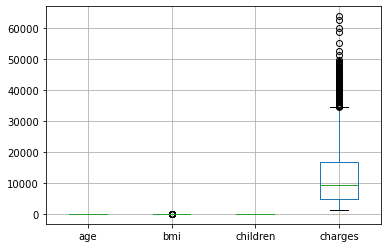

In [8]:
data.boxplot()

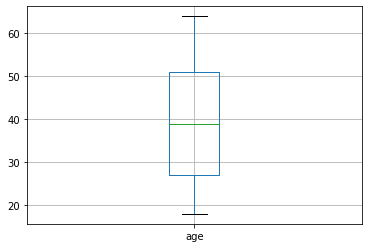

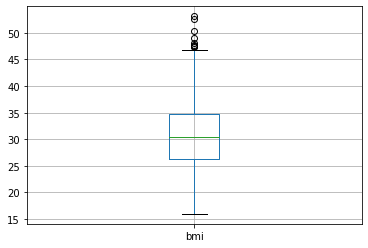

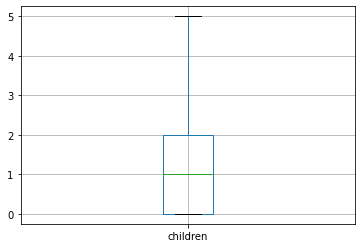

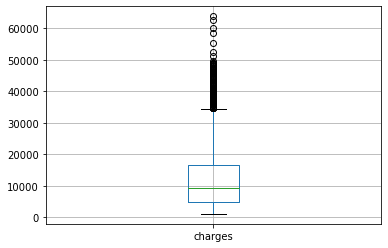

In [10]:
# Finding outliers in the data
colname=[]
for x in data.columns:
    if data[x].dtype=="int64" or data[x].dtype=="float64":
        colname.append(x)
        
for x in colname:
    data.boxplot(column=x)
    plt.show()

There are some outliers in the data but they are all important to the data so not making any treatment

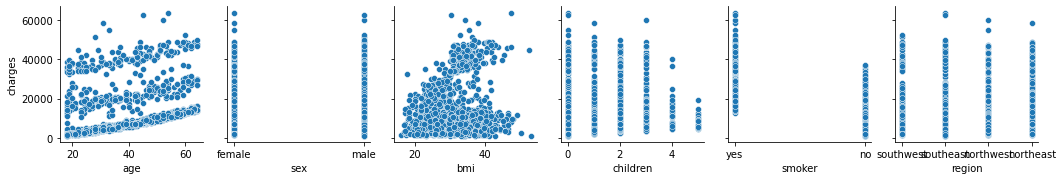

In [9]:
# Seeing relationship between independent variable and dependent variable
sns.pairplot(data,x_vars=["age","sex","bmi","children","smoker","region"],
            y_vars="charges",kind="scatter")

In [10]:
# Dividing independent and dependent variable
X = data[["age","sex","bmi","children","smoker","region"]]
Y = data[["charges"]]

In [11]:
print(X.shape)
print(Y.shape)

(1338, 6)
(1338, 1)


C:\Users\Nandu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

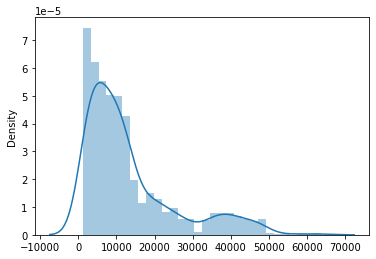

In [12]:
# There is a normal distribution in the dependent variable or not
sns.distplot(Y)

C:\Users\Nandu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

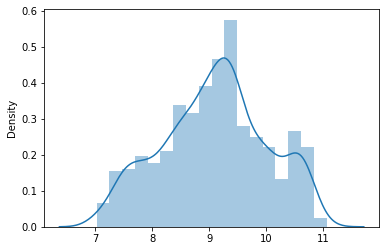

In [13]:
# Converting the dependent variable in normal distribution
Y = np.log(Y)
sns.distplot(Y,hist=True)

In [14]:
# Avoiding warnings
import warnings
warnings.filterwarnings("ignore")

Converting categorical data into integer

In [15]:
data["sex"] = data["sex"].replace(["female","male"],[0,1])

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [17]:
data["smoker"] = data["smoker"].replace(["no","yes"],[0,1])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [18]:
data["region"] = data["region"].replace(["northeast","northwest","southeast","southwest"],[0,1,2,3])

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [20]:
X = data[["age","sex","bmi","children","smoker","region"]]

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>]], dtype=object)

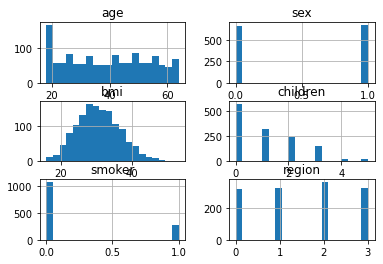

In [21]:
X.hist(bins=20)

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


<AxesSubplot:>

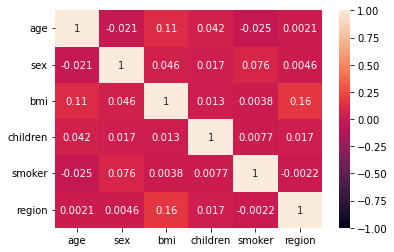

In [22]:
# Seeing the relationship between independent variable
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [23]:
# Seeing multicollinearty in the data
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


In [24]:
# Spliting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 6)
(268, 6)
(1070, 1)
(268, 1)


In [26]:
# Runing Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [27]:
X = data[["age","sex","bmi","children","smoker","region"]]
Y = np.log(Y)

In [28]:
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

[6.99879762]
[[ 0.03498834 -0.0711322   0.01259126  0.09962977  1.5693443  -0.03889152]]


In [29]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[[ 8.90264566]
 [ 8.55800249]
 [ 9.44206862]
 [ 9.37109228]
 [ 8.30231857]
 [ 8.93127398]
 [ 9.22860018]
 [ 9.62770497]
 [ 8.96169962]
 [10.524292  ]
 [ 8.12183109]
 [ 8.270934  ]
 [ 8.75991467]
 [ 9.14967223]
 [ 9.23002002]
 [ 9.36183759]
 [ 8.32332991]
 [ 9.81527793]
 [ 9.18395253]
 [10.20908992]
 [10.5308626 ]
 [ 8.06726747]
 [ 7.95992684]
 [ 8.77128514]
 [ 8.43374205]
 [ 9.41895434]
 [ 9.01687327]
 [ 9.41850025]
 [ 8.42170066]
 [10.20084299]
 [ 7.72507636]
 [10.38861159]
 [ 8.89576619]
 [ 8.94511958]
 [ 8.45447782]
 [ 8.89057139]
 [ 9.43604078]
 [ 9.09248396]
 [ 9.09271164]
 [ 8.89473802]
 [ 9.58926813]
 [ 9.15682789]
 [ 8.54484462]
 [ 8.99761391]
 [ 7.99767708]
 [ 8.81979395]
 [ 8.91337357]
 [10.61798009]
 [ 9.30298176]
 [ 9.24221911]
 [10.01078002]
 [ 8.31758485]
 [ 8.90942155]
 [ 9.62809789]
 [ 9.09900057]
 [ 9.38167738]
 [ 9.30538021]
 [ 8.63050675]
 [ 8.707771  ]
 [10.70371838]
 [ 7.87802912]
 [10.61635976]
 [11.07322819]
 [ 7.95757539]
 [ 9.99650111]
 [ 8.87336923]
 [ 8.47709

In [30]:
lm.score(X_train, Y_train)

0.7811636363349586

In [31]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual Value"]=Y_test
new_df["Predictive Value"]=Y_pred
new_df

,age,sex,bmi,children,smoker,region,Actual Value,Predictive Value
7,37,0,27.740,3,0,1,8.893093,8.902646
999,36,0,26.885,0,0,1,8.569372,8.558002
1209,59,1,37.100,1,0,3,9.421182,9.442069
491,61,0,25.080,0,0,2,10.106963,9.371092
625,29,0,26.030,0,0,1,8.225895,8.302319
...,...,...,...,...,...,...,...,...
271,50,1,34.200,2,1,3,10.665620,10.759633
695,26,0,40.185,0,0,1,8.071295,8.375583
1039,19,1,27.265,2,0,1,10.020989,8.096113
323,57,1,40.945,0,0,0,9.355851,9.437550


In [32]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624696
RMSE: 0.4882327185684707
Adj R-square: 0.703623414730595


In [33]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train, Y_train)

print(lm.intercept_)
print(lm.coef_)

[7.00041521]
[[ 0.03498462 -0.07025584  0.01259184  0.09952118  1.5602262  -0.03886915]]


In [34]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[[ 8.90383819]
 [ 8.559524  ]
 [ 9.44432297]
 [ 9.37254216]
 [ 8.30386562]
 [ 8.93264867]
 [ 9.23044255]
 [ 9.62008163]
 [ 8.96299492]
 [10.51642592]
 [ 8.12406577]
 [ 8.27247141]
 [ 8.76226365]
 [ 9.15083063]
 [ 9.23137113]
 [ 9.36326822]
 [ 8.32481017]
 [ 9.81730179]
 [ 9.18544459]
 [10.20223939]
 [10.52398423]
 [ 8.06885693]
 [ 7.96149259]
 [ 8.77266848]
 [ 8.43509829]
 [ 9.42039288]
 [ 9.01907481]
 [ 9.41962597]
 [ 8.42309111]
 [10.19404856]
 [ 7.7275781 ]
 [10.38171259]
 [ 8.89727941]
 [ 8.94724544]
 [ 8.45682241]
 [ 8.89191125]
 [ 9.43834376]
 [ 9.09487269]
 [ 9.094159  ]
 [ 8.896934  ]
 [ 9.59071732]
 [ 9.15895566]
 [ 8.54636553]
 [ 8.9990888 ]
 [ 8.00017241]
 [ 8.82120653]
 [ 8.91559517]
 [10.61089538]
 [ 9.30527048]
 [ 9.24366554]
 [10.00310992]
 [ 8.31916204]
 [ 8.91172601]
 [ 9.6293009 ]
 [ 9.10136015]
 [ 9.38400733]
 [ 9.30671351]
 [ 8.63283569]
 [ 8.71008752]
 [10.69579563]
 [ 7.88047073]
 [10.60941801]
 [11.06553125]
 [ 7.96004765]
 [ 9.98958379]
 [ 8.87490557]
 [ 8.47930

In [35]:
lm.score(X_train, Y_train)

0.7811479777700893

In [36]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
#R-squared: 0.6952574312612805
#RMSE: 0.055466449671478374
#Adj R-square: 0.6938836856471315

R-squared: 0.7052731948166413
RMSE: 0.487968097039376
Adj R-square: 0.7039445991509011


In [37]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

[7.89587545]
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [38]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[9.02181452 8.99138374 9.6912918  9.75215338 8.77836824 9.14353766
 9.26526081 8.50449116 9.23483002 9.20439923 8.53492195 8.68707588
 9.20439923 9.14353766 9.35655316 9.72172259 8.65664509 9.81301495
 9.59999945 8.99138374 9.23483002 8.47406038 8.44362959 9.05224531
 8.74793745 9.6912918  9.23483002 9.53913788 8.68707588 9.08267609
 8.47406038 9.08267609 9.26526081 9.23483002 8.77836824 8.96095295
 9.78258416 9.47827631 9.41741473 9.23483002 9.81301495 9.41741473
 8.99138374 9.23483002 8.44362959 9.17396845 9.32612238 9.14353766
 9.6912918  9.59999945 8.59578352 8.74793745 9.26526081 9.66086102
 9.50870709 9.75215338 9.47827631 9.05224531 9.14353766 9.20439923
 8.44362959 9.38698395 9.81301495 8.56535274 8.80879902 9.26526081
 8.77836824 9.14353766 9.23483002 9.32612238 9.20439923 8.44362959
 9.14353766 9.11310688 9.29569159 9.38698395 8.99138374 9.17396845
 8.47406038 9.32612238 9.38698395 9.44784552 8.44362959 8.71750666
 9.47827631 8.68707588 8.44362959 8.50449116 8.96095295 9.3869

In [39]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
#R-squared: 0.6952574312612805
#RMSE: 0.055466449671478374
#Adj R-square: 0.6938836856471315

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


In [40]:
lm.score(X_train, Y_train)

0.2883443259861952

In [41]:
new_df = pd.DataFrame()
new_df = X_train.copy()

new_df["charges"]=Y_train.copy()
new_df.shape

(1070, 7)

In [42]:
# Building OLS model 
import statsmodels.formula.api as sm

lm_model = sm.ols(formula="charges ~ age + sex + bmi + children + smoker + region",
                 data=new_df).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    6.998798
age          0.034988
sex         -0.071132
bmi          0.012591
children     0.099630
smoker       1.569344
region      -0.038892
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     632.4
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:04:17   Log-Likelihood:                -620.60
No. Observations:                1070   AIC:                             1255.
Df Residuals:                    1063   BIC:                             1290.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

In [43]:
Y_pred = lm_model.predict(X_test)

In [44]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
#R-squared: 0.6952574312612805
#RMSE: 0.055466449671478374
#Adj R-square: 0.6938836856471315

R-squared: 0.7049534517624696
RMSE: 0.4882327185684707
Adj R-square: 0.703623414730595


Text(0, 0.5, 'Residuals')

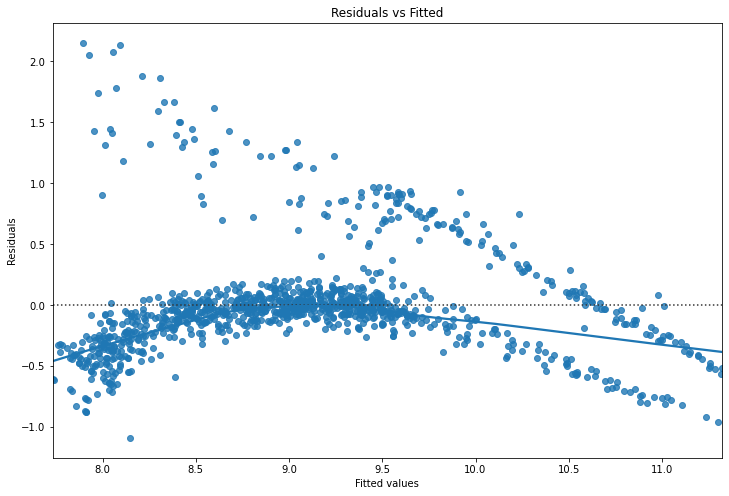

In [45]:
# Checking errors are random or not
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'charges', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

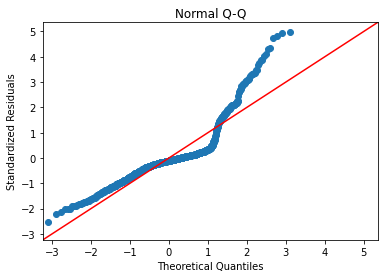

In [46]:
# Checking errors follow normal distribution
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631   0.43849455]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631   0.43849455]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631   0.43849455]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631   1.34390459]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663 -0.46691549]]


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [49]:
# Runing SGDRegressor 
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant", eta0=0.001, shuffle=True, random_state=10, max_iter=1000, early_stopping=True,
                 n_iter_no_change=5)
lm.fit(X_train, Y_train)

print(lm.intercept_)
print(lm.coef_)

[2.202249]
[ 0.05675366 -0.00386715  0.00813964  0.01423621  0.06767449 -0.004542  ]


In [50]:
Y_pred_new = lm.predict(X_test)
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6942363297935907
RMSE: 0.05555929772582388
Adj R-square: 0.6928579811675664
